<a href="https://colab.research.google.com/github/KubatyM129/Learning_PyTorch_and_ML/blob/main/First_Simple_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#linear regression Y = a + bX
weight = 0.7 #b
bias = 0.3 #a

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X*X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3003],
         [0.3011],
         [0.3025],
         [0.3045],
         [0.3070],
         [0.3101],
         [0.3137],
         [0.3179],
         [0.3227]]),
 50,
 50)

In [62]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [63]:
def plot_predictions(train_data=X_train, train_labels= y_train, test_data=X_test, test_labels = y_test, predictions=None):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Traning data")

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
      plt.scatter(test_data, predictions, c="r", s=4, label="Preds")

    plt.legend(prop={"size":14})


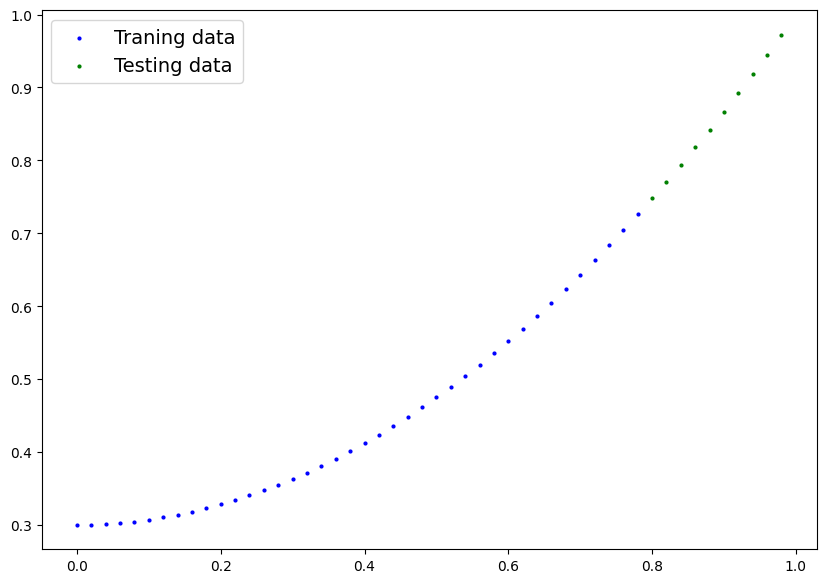

In [64]:
plot_predictions()

In [65]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    #Forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
     return self.weights*x*x+self.bias


In [66]:
#random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [67]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [68]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3443],
        [0.3552],
        [0.3664],
        [0.3778],
        [0.3895],
        [0.4015],
        [0.4138],
        [0.4263],
        [0.4391],
        [0.4522]])

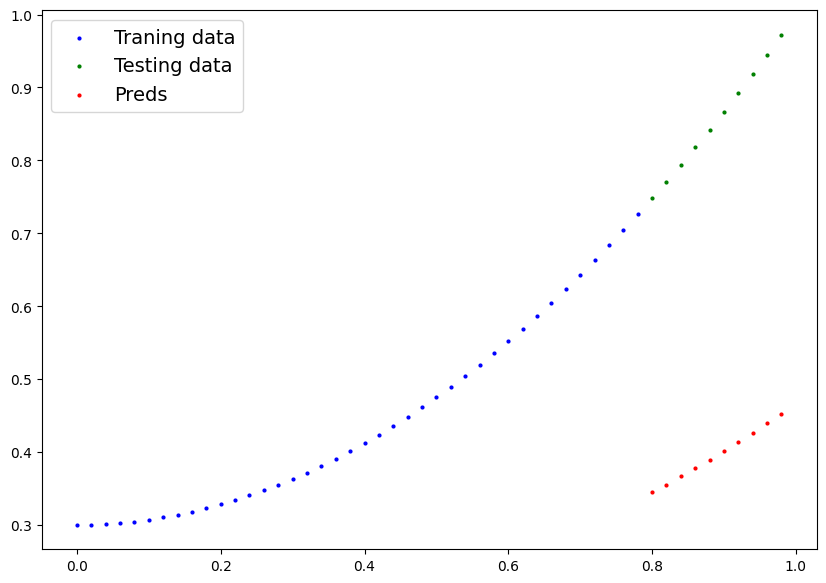

In [69]:
plot_predictions(predictions=y_preds)

In [70]:
MAE_loss = torch.nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

In [71]:
# Training loop
epochs = 2500

for epoch in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)

  loss= MAE_loss(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


In [72]:
# Testing loop
model_0.eval()
with torch.inference_mode():
  test_preds = model_0(X_test)

  test_loss = MAE_loss(test_preds, y_test)

print(test_loss)

tensor(0.0006)


tensor(0.0008, grad_fn=<MeanBackward0>)
tensor([[0.7475],
        [0.7702],
        [0.7934],
        [0.8172],
        [0.8415],
        [0.8664],
        [0.8919],
        [0.9179],
        [0.9445],
        [0.9716]])


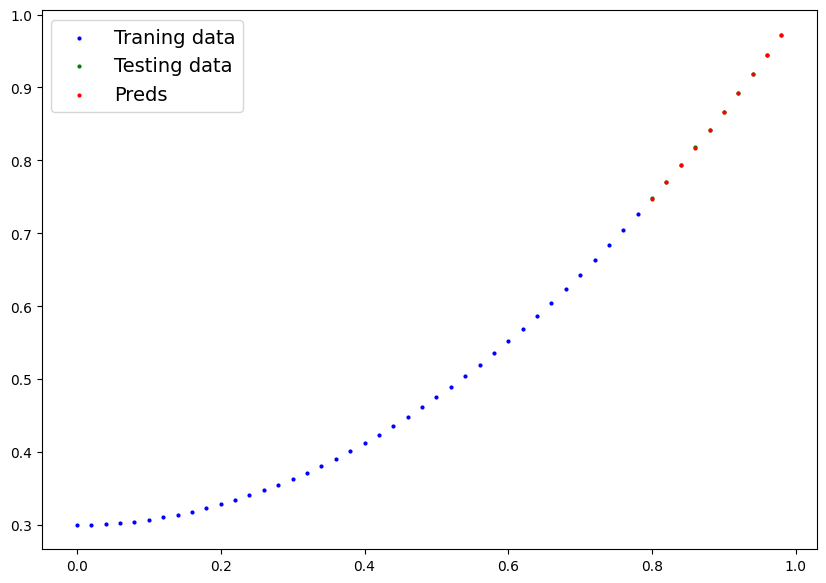

In [73]:
print(loss)

with torch.inference_mode():
  y_preds_new = model_0(X_test)
  print(y_preds_new)
  plot_predictions(predictions=y_preds_new)